# play with useful integrals for window time filtering

In [1]:
import numpy as np
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt

import sympy as sym
from sympy import Abs, exp, I, cos
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.printing.pycode import NumPyPrinter 
sym.init_printing()

In [2]:
# define useful parameters
T, omega, omega0 = sym.symbols('T, omega, omega_0', positive=True)
t1, t2 = sym.symbols('t1, t2')

---

## slow variance contribution

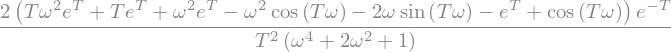

In [3]:
It = (sym.integrate(exp(-Abs(t1-t2))
                    *cos(omega*(t1-t2)),
                   (t1, -T/2, T/2), 
                   (t2, -T/2, T/2))
      /T**2
     )
It = It.simplify()
It

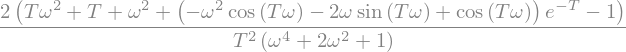

In [4]:
em = sym.symbols('em', positive=True) # temporary variable useful for simplifications
It = It.subs(exp(T), 1/em).simplify().subs(em, exp(-T))
It

In [5]:
print_latex(It)

\frac{2 \left(T \omega^{2} + T + \omega^{2} + \left(- \omega^{2} \cos{\left(T \omega \right)} - 2 \omega \sin{\left(T \omega \right)} + \cos{\left(T \omega \right)}\right) e^{- T} - 1\right)}{T^{2} \left(\omega^{4} + 2 \omega^{2} + 1\right)}


In [6]:
NumPyPrinter().doprint(It)

'2*(T*omega**2 + T + omega**2 + (-omega**2*numpy.cos(T*omega) - 2*omega*numpy.sin(T*omega) + numpy.cos(T*omega))*numpy.exp(-T) - 1)/(T**2*(omega**4 + 2*omega**2 + 1))'

### general properties

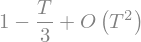

In [7]:
# value when T is 0
It.series(T, 0, 2).simplify()

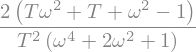

In [8]:
# asymptotic behavior for large T
It.subs(exp(-T), 0) #.series(T, sym.oo, 2).simplify()

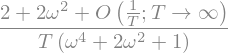

In [9]:
It.subs(exp(-T), 0).series(T, sym.oo, 2).simplify()

### moving average case:

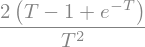

In [10]:
It.subs(omega,0)

In [11]:
print_latex(It.subs(omega,0))

\frac{2 \left(T - 1 + e^{- T}\right)}{T^{2}}


### some plots

In [12]:
It_f = sym.lambdify((T, omega), It, 'numpy')
ds = xr.Dataset(coords={'T': np.arange(.1,10.,.1), 
                        'omega': np.arange(0.,10.,.1)})
ds['It'] = (['T', 'omega'], It_f((ds.T+ds.omega*0.).values, (ds.T*0.+ds.omega).values))

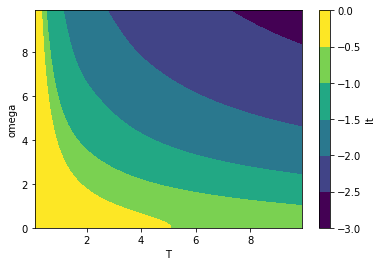

In [13]:
np.log10(ds['It']).plot.contourf(x='T')

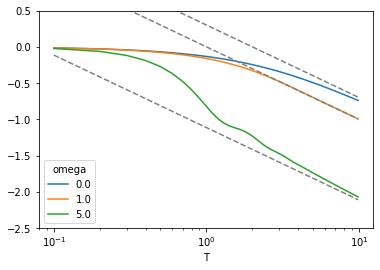

In [14]:
fig, ax = plt.subplots()

np.log10(ds['It']).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='T', xscale='log')

It_T_oo = 2/ds.T/(1+ds.omega**2)
np.log10(It_T_oo).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='T', ls='--', color='0.5', xscale='log', add_legend=False)

ax.set_ylim((-2.5,.5))

---
## non-stationary variance contribution

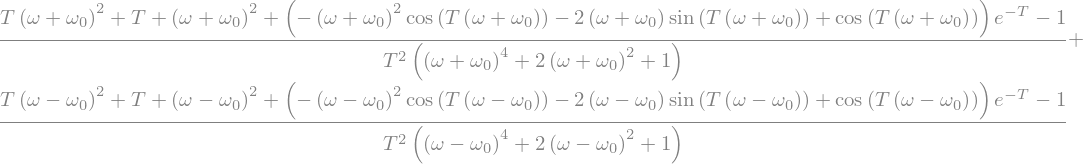

In [15]:
Ip = It.subs(omega, omega+omega0)/2 + It.subs(omega, omega-omega0)/2
Ip

In [16]:
print_latex(Ip)

\frac{T \left(\omega + \omega_{0}\right)^{2} + T + \left(\omega + \omega_{0}\right)^{2} + \left(- \left(\omega + \omega_{0}\right)^{2} \cos{\left(T \left(\omega + \omega_{0}\right) \right)} - 2 \left(\omega + \omega_{0}\right) \sin{\left(T \left(\omega + \omega_{0}\right) \right)} + \cos{\left(T \left(\omega + \omega_{0}\right) \right)}\right) e^{- T} - 1}{T^{2} \left(\left(\omega + \omega_{0}\right)^{4} + 2 \left(\omega + \omega_{0}\right)^{2} + 1\right)} + \frac{T \left(\omega - \omega_{0}\right)^{2} + T + \left(\omega - \omega_{0}\right)^{2} + \left(- \left(\omega - \omega_{0}\right)^{2} \cos{\left(T \left(\omega - \omega_{0}\right) \right)} - 2 \left(\omega - \omega_{0}\right) \sin{\left(T \left(\omega - \omega_{0}\right) \right)} + \cos{\left(T \left(\omega - \omega_{0}\right) \right)}\right) e^{- T} - 1}{T^{2} \left(\left(\omega - \omega_{0}\right)^{4} + 2 \left(\omega - \omega_{0}\right)^{2} + 1\right)}


In [17]:
NumPyPrinter().doprint(It)

'2*(T*omega**2 + T + omega**2 + (-omega**2*numpy.cos(T*omega) - 2*omega*numpy.sin(T*omega) + numpy.cos(T*omega))*numpy.exp(-T) - 1)/(T**2*(omega**4 + 2*omega**2 + 1))'

### general properties

In [18]:
# value when T is 0, should inherit values from It
# but calculation is pretty slow
#Ip.series(T, 0, 2).simplify()

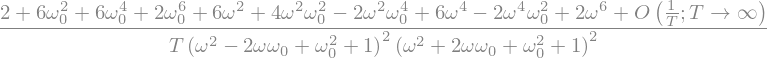

In [19]:
# asymptotic behavior for large T
Ip.subs(exp(-T), 0).series(T, sym.oo, 2).simplify().factor()

### moving average case

The moving averaged case for the non-stationary variance contribution is equivalent to that associated with the slow turbulence with $\omega=\omega_0$.

### demodulation case

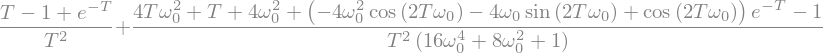

In [20]:
Ip_omega0 = Ip.subs(omega,omega0)
Ip_omega0

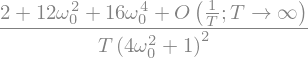

In [21]:
Ip_omega0.subs(exp(-T), 0).series(T, sym.oo, 2).simplify().factor()

### some plots

In [22]:
Ip_omega0_f = sym.lambdify((T, omega0), Ip_omega0, 'numpy')
ds['Ip_omega_0'] = (['T', 'omega'], Ip_omega0_f((ds.T+ds.omega*0.).values, (ds.T*0.+ds.omega).values))

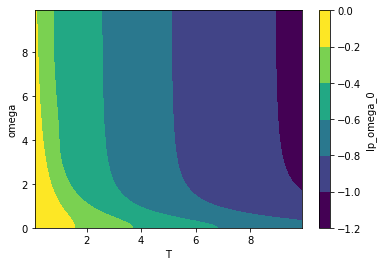

In [23]:
np.log10(ds['Ip_omega_0']).plot.contourf(x='T')

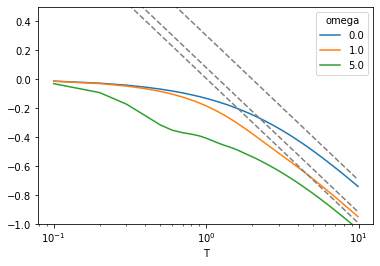

In [24]:
fig, ax = plt.subplots()

np.log10(ds['Ip_omega_0']).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='T', xscale='log')

Ip_T_oo = (2+12*ds.omega**2+16*ds.omega**4)/ds.T/(1+4*ds.omega**2)**2
np.log10(Ip_T_oo).sel(omega=[0, 1, 5], method='nearest').plot.line(ax=ax, x='T', ls='--', color='0.5', xscale='log', add_legend=False)

ax.set_ylim((-1.,.5))